In [9]:
from eit_reconstruction_models import EITReconstructionModel as model_cls
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from load_6_point_data import *
import pickle
from sklearn.preprocessing import StandardScaler
from classification_report_metrics import *

In [ ]:
# load data
pickle_fname = "2d_8_elec_6_points"
voltage_array = get_voltages_array("electrodes.csv", "unpressed_phase.csv", "pressed_phase.csv", noise_factor=0.0001)
output_array = get_output_array("patterns.csv")

X_train, X_test, y_train, y_test = train_test_split(voltage_array, output_array, test_size=0.2, random_state=42)
scaler = StandardScaler()

# Transform both training and test data (using the same scaler)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


[0, 6, 12, 18, 24, 246, 252, 258, 264, 265, 480, 492, 498, 504, 505, 720, 726, 738, 744, 745, 960, 966, 972, 984, 985, 1200, 1206, 1212, 1218, 1225, 1440, 1446, 1452, 1458, 1464, 1470, 1476, 1482, 1488, 1494]


/cs/student/projects1/2021/nchavda/Final-year-project/load_6_point_data.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.apply(lambda row: is_valid_config(row[0], row[1], row[2], row[3]), axis=1)


In [11]:
# create transfer learning model and train
my_model = model_cls(40, 6)
with open(f'training_{pickle_fname}_coord_to_index.pkl', 'rb') as f:
    my_model.coordinate_to_index = pickle.load(f)
    
model = my_model.create_dnn_model_classification()
# model = my_t.create_1d_cnn_model_classification()
my_model.load_model("2d_8_elec_6_points_model_classification.weights.h5")
# my_t.load_model("2d_8_elec_6_points_cnn_model_classification.weights.h5")
transfer_model, history = my_model.transfer_learning_model(X_train, y_train, epochs=200, cnn=False)

/cs/student/projects1/2021/nchavda/Final-year-project/.venv/lib64/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200


/cs/student/projects1/2021/nchavda/Final-year-project/.venv/lib64/python3.9/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 38 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - example_based_f1: 0.5484 - hamming_loss: 0.4732 - jaccard_accuracy: 0.4139 - loss: 6.5977 - root_mean_squared_error: 0.6702
Epoch 2/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - example_based_f1: 0.5430 - hamming_loss: 0.4654 - jaccard_accuracy: 0.4091 - loss: 6.1735 - root_mean_squared_error: 0.6635  
Epoch 3/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - example_based_f1: 0.5134 - hamming_loss: 0.4725 - jaccard_accuracy: 0.3845 - loss: 6.1385 - root_mean_squared_error: 0.6693
Epoch 4/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - example_based_f1: 0.5179 - hamming_loss: 0.4741 - jaccard_accuracy: 0.3873 - loss: 5.7982 - root_mean_squared_error: 0.6658  
Epoch 5/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - example_based_f1: 0.5036 - hamming_loss: 0.4749 - jaccard_accuracy: 0.3779 - loss: 5.5085 - root_mean_squared_error: 0.6670
Epoch 6/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - example_based_f1: 0.5000 - hamming_loss: 0.4699 - jaccard_accuracy: 0.

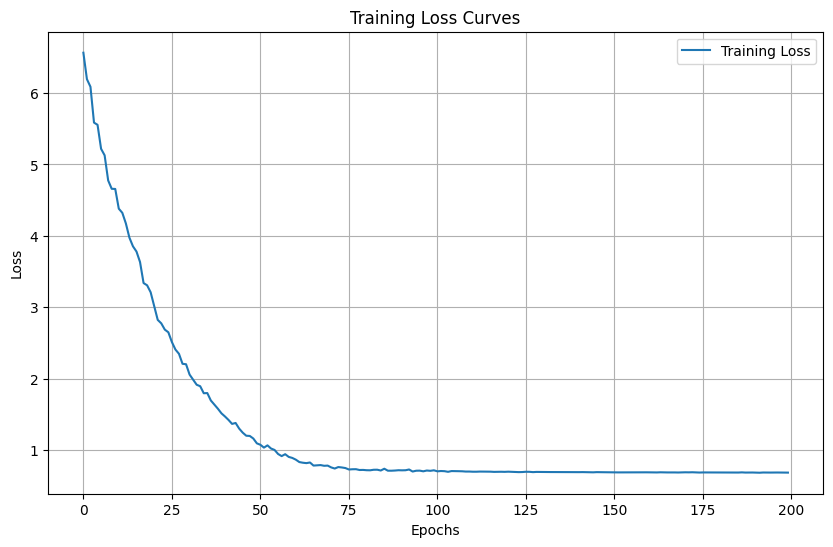

In [12]:
train_loss = history.history['loss']

# Plot the training loss curves
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.title('Training Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
# evaluation
results = transfer_model.evaluate(X_test, y_test)
y_pred = transfer_model.predict(X_test)
y_pred_bin = (y_pred >= 0.5).astype(int)
print(y_pred[:10])
print(y_pred_bin[:10])
print(y_test[:10])


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - example_based_f1: 0.5902 - hamming_loss: 0.4384 - jaccard_accuracy: 0.4560 - loss: 0.6841 - root_mean_squared_error: 0.4954
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[0.5022619  0.51202214 0.5216703  0.5389533  0.5231423  0.5634164 ]
 [0.4921366  0.50353396 0.53669995 0.5789783  0.5135659  0.67492694]
 [0.5403859  0.45059764 0.45785686 0.5475692  0.5011862  0.55546767]
 [0.48404226 0.5039298  0.4919123  0.60249984 0.5005448  0.734635  ]
 [0.5121575  0.51609653 0.47673002 0.5007893  0.51032525 0.47545713]
 [0.50777936 0.521064   0.5234702  0.54398406 0.5235917  0.5887778 ]
 [0.48774943 0.56973433 0.53093684 0.50758487 0.5343412  0.53711176]
 [0.5108156  0.5234422  0.5006547  0.5020175  0.5166703  0.46726134]
 [0.52732474 0.4092681  0.46137106 0.5151124  0.49196193 0.44483474]
 [0.5154448  0.459628   0.4843214  0.55037576 0.49972573 0.5541866 ]]
[[1 1 1 1 1 1]
 [0 1 1 1 1 1]
 [1 0 0 1 1 1]
 [0 1 0 1 1 1]
 [1 1 0 1 1 0]
 [1 1 1 1 1 1]
 [0 1 1 1 1 1]
 [

              precision    recall  f1-score   support

           0       0.52      0.74      0.61       130
           1       0.54      0.49      0.51       131
           2       0.63      0.49      0.55       136
           3       0.48      0.81      0.60       118
           4       0.55      0.76      0.64       135
           5       0.66      0.76      0.70       128

   micro avg       0.55      0.67      0.61       778
   macro avg       0.56      0.67      0.60       778
weighted avg       0.56      0.67      0.60       778
 samples avg       0.56      0.67      0.57       778



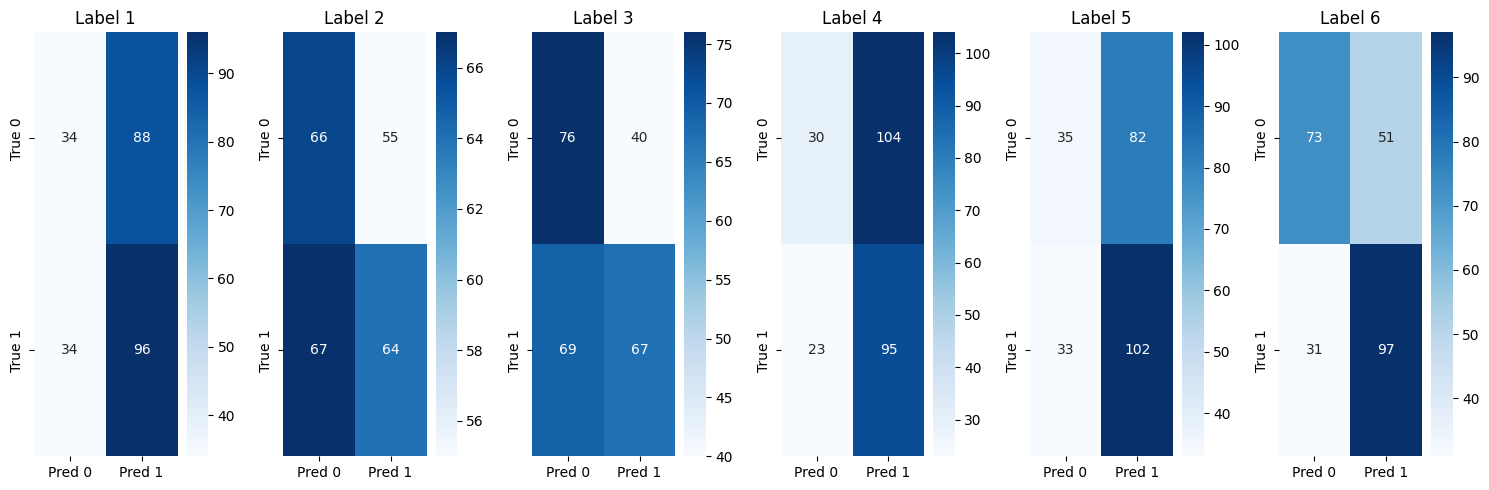

In [14]:
# Show classification report and visualise confusion matrices
print_report(y_test, y_pred_bin)
create_multilabel_confusion_matrix(y_test, y_pred_bin)